In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
PATH = '../dataset/Crop_recommendation_Dataset.csv'
df = pd.read_csv(PATH)

In [3]:
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [4]:
df.tail()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,Coffee


In [5]:
df.size

17600

In [6]:
df.shape

(2200, 8)

In [7]:
df.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop'],
      dtype='object')

In [8]:
df['Crop'].unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [9]:
df.dtypes

Nitrogen         int64
Phosphorus       int64
Potassium        int64
Temperature    float64
Humidity       float64
pH_Value       float64
Rainfall       float64
Crop            object
dtype: object

In [10]:
df['Crop'].value_counts()

Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

In [11]:
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [12]:
df_new = df.copy()

df_new.drop('Crop', axis=1, inplace=True)

<Axes: >

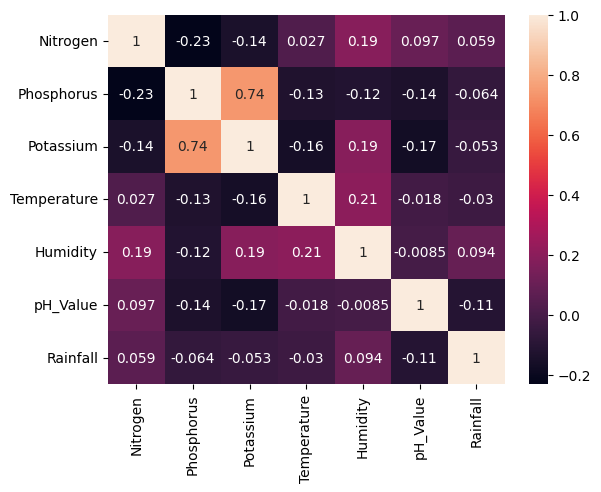

In [13]:
sns.heatmap(df_new.corr(),annot=True)

Seperating features and target label

In [14]:
features = df[['Nitrogen', 'Phosphorus','Potassium','Temperature', 'Humidity', 'pH_Value', 'Rainfall']]
target = df['Crop']
labels = df['Crop']

In [15]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [16]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        13
      Banana       1.00      1.00      1.00        17
   Blackgram       0.59      1.00      0.74        16
    ChickPea       1.00      1.00      1.00        21
     Coconut       0.91      1.00      0.95        21
      Coffee       1.00      1.00      1.00        22
      Cotton       1.00      1.00      1.00        20
      Grapes       1.00      1.00      1.00        18
        Jute       0.74      0.93      0.83        28
 KidneyBeans       0.00      0.00      0.00        14
      Lentil       0.68      1.00      0.81        23
       Maize       1.00      1.00      1.00        21
       Mango       1.00      1.00      1.00        26
   MothBeans       0.00      0.00      0.00        19
    MungBean       1.00      1.00      1.00        24
   Muskmelon       1.00      1.00      1.00        23
      Orange       1.00      1.00      1.00   

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [20]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

**Saving trained Decision Tree model**

In [21]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        13
      Banana       1.00      1.00      1.00        17
   Blackgram       1.00      1.00      1.00        16
    ChickPea       1.00      1.00      1.00        21
     Coconut       1.00      1.00      1.00        21
      Coffee       1.00      1.00      1.00        22
      Cotton       1.00      1.00      1.00        20
      Grapes       1.00      1.00      1.00        18
        Jute       0.88      1.00      0.93        28
 KidneyBeans       1.00      1.00      1.00        14
      Lentil       1.00      1.00      1.00        23
       Maize       1.00      1.00      1.00        21
       Mango       1.00      1.00      1.00        26
   MothBeans       1.00      1.00      1.00        19
    MungBean       1.00      1.00      1.00        24
   Muskmelon       1.00      1.00      1.00        23
      Orange       1.00      1.00  

In [23]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

**Saving trained Guassian Naive Bayes model**

In [24]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [25]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.10681818181818181
              precision    recall  f1-score   support

       Apple       1.00      0.23      0.38        13
      Banana       1.00      0.24      0.38        17
   Blackgram       1.00      0.19      0.32        16
    ChickPea       1.00      0.05      0.09        21
     Coconut       1.00      0.05      0.09        21
      Coffee       0.00      0.00      0.00        22
      Cotton       1.00      0.05      0.10        20
      Grapes       1.00      0.06      0.11        18
        Jute       1.00      0.07      0.13        28
 KidneyBeans       0.03      1.00      0.07        14
      Lentil       0.00      0.00      0.00        23
       Maize       0.00      0.00      0.00        21
       Mango       0.00      0.00      0.00        26
   MothBeans       0.00      0.00      0.00        19
    MungBean       1.00      0.12      0.22        24
   Muskmelon       1.00      0.30      0.47        23
      Orange       1.00      0.03      0.

In [26]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.27727273, 0.28863636, 0.29090909, 0.275     , 0.26818182])

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        13
      Banana       1.00      1.00      1.00        17
   Blackgram       0.86      0.75      0.80        16
    ChickPea       1.00      1.00      1.00        21
     Coconut       1.00      1.00      1.00        21
      Coffee       1.00      1.00      1.00        22
      Cotton       0.86      0.90      0.88        20
      Grapes       1.00      1.00      1.00        18
        Jute       0.84      0.93      0.88        28
 KidneyBeans       1.00      1.00      1.00        14
      Lentil       0.88      1.00      0.94        23
       Maize       0.90      0.86      0.88        21
       Mango       0.96      1.00      0.98        26
   MothBeans       0.84      0.84      0.84        19
    MungBean       1.00      0.96      0.98        24
   Muskmelon       1.00      1.00      1.00        23
      Orange       1.00   

In [28]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

**Saving trained Logistic Regression model**

In [29]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        13
      Banana       1.00      1.00      1.00        17
   Blackgram       0.94      1.00      0.97        16
    ChickPea       1.00      1.00      1.00        21
     Coconut       1.00      1.00      1.00        21
      Coffee       1.00      1.00      1.00        22
      Cotton       1.00      1.00      1.00        20
      Grapes       1.00      1.00      1.00        18
        Jute       0.90      1.00      0.95        28
 KidneyBeans       1.00      1.00      1.00        14
      Lentil       1.00      1.00      1.00        23
       Maize       1.00      1.00      1.00        21
       Mango       1.00      1.00      1.00        26
   MothBeans       1.00      0.95      0.97        19
    MungBean       1.00      1.00      1.00        24
   Muskmelon       1.00      1.00      1.00        23
      Orange       1.00      1.00      1.00 

In [31]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

**Saving trained Random Forest model**

In [32]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [37]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit_transform(target)
Ytrain_labelencoded = le.transform(Ytrain)
Ytest_labelencoded = le.transform(Ytest)

XB = xgb.XGBClassifier()
XB.fit(Xtrain, Ytrain_labelencoded)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest_labelencoded, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest_labelencoded, predicted_values))

XGBoost's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.93      0.96      0.95        28
           9       1.00      1.00      1.00        14
          10       0.96      1.00      0.98        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      

**Saving Trained XGBoost Model**

In [38]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

**Accuracy Comparison**

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

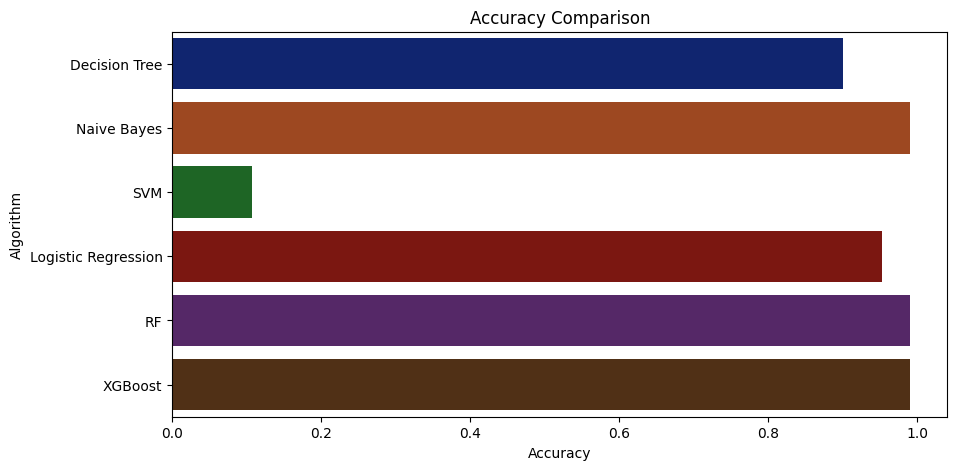

In [39]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [40]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
Naive Bayes --> 0.990909090909091
SVM --> 0.10681818181818181
Logistic Regression --> 0.9522727272727273
RF --> 0.990909090909091
XGBoost --> 0.990909090909091


**Making Predictions**

In [41]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['Coffee']


In [42]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['Jute']
